### **Loading Necessary Libraries and Mounting Drive**

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Loading Preprocessed data**

In [2]:
final_train_x=np.load('/content/drive/My Drive/DATASET/final_train_x.npy')
final_train_y=np.load('/content/drive/My Drive/DATASET/final_train_y.npy')
final_test_x=np.load('/content/drive/My Drive/DATASET/final_test_x.npy')
final_test_y=np.load('/content/drive/My Drive/DATASET/final_test_y.npy')

# ***Model Design***

In [3]:
# CNN model for training
model = Sequential()


#Convulation layer with batch normalization,activation with relu and maxpooling
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu' ))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

#Flattening layer
model.add(Flatten())


# Dense and Dropout Layers
model.add(Dense(256,activation ="relu"))
model.add(Dense(512,activation ="relu"))
model.add(Dropout(0.25))

# Classification
model.add(Dense(62,activation ="softmax"))


# **Training**

In [4]:
#Model Compile with adam optimizer
model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
#Providing callbacks during training
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [6]:
#Fitting the model
history = model.fit(final_train_x, final_train_y ,epochs=40, validation_data = (final_test_x,final_test_y) ,callbacks=[MCP,ES,RLP])

Epoch 1/40
21811/21811 [==============================] - ETA: 0s - loss: 0.3537 - accuracy: 0.8764
Epoch 1: val_accuracy improved from -inf to 0.89141, saving model to Best_points.h5
21811/21811 [==============================] - 167s 7ms/step - loss: 0.3537 - accuracy: 0.8764 - val_loss: 0.3046 - val_accuracy: 0.8914 - lr: 0.0010
Epoch 2/40
21810/21811 [============================>.] - ETA: 0s - loss: 0.2813 - accuracy: 0.8971
Epoch 2: val_accuracy improved from 0.89141 to 0.89726, saving model to Best_points.h5
21811/21811 [==============================] - 140s 6ms/step - loss: 0.2813 - accuracy: 0.8971 - val_loss: 0.2827 - val_accuracy: 0.8973 - lr: 0.0010
Epoch 3/40
21807/21811 [============================>.] - ETA: 0s - loss: 0.2669 - accuracy: 0.9010
Epoch 3: val_accuracy did not improve from 0.89726
21811/21811 [==============================] - 146s 7ms/step - loss: 0.2669 - accuracy: 0.9010 - val_loss: 0.2904 - val_accuracy: 0.8947 - lr: 0.0010
Epoch 4/40
21803/21811 [====

## **Summary and Accuracy**

### *Model Summary*

In [7]:
#Getting model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0

### *Plotting Model accuracy and loss*

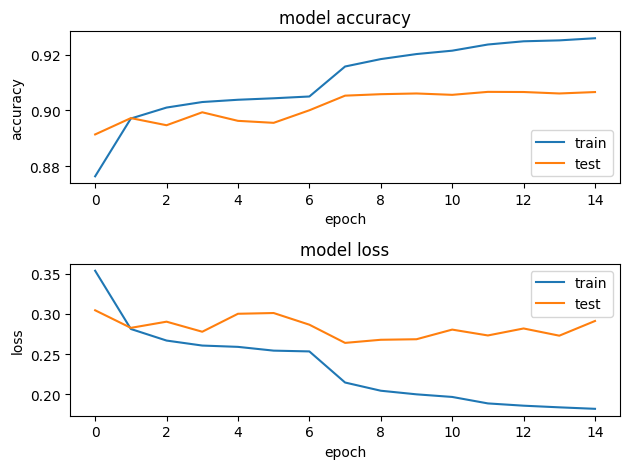

In [15]:
# Plot accuracy vs epoch
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.savefig('/content/drive/My Drive/accuracy.png')

# Plot loss vs epoch
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('/content/drive/My Drive/loss.png')

plt.tight_layout()
plt.savefig('/content/drive/My Drive/full.png')

## **Model Saving**

In [11]:
model.save('/content/drive/My Drive/Model/model_v5.h5')
model.save('/content/drive/My Drive/Model/model_v5.keras')